In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import tensorflow
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml

from tensorflow.keras.datasets import fashion_mnist

In [2]:
mnist = fetch_openml(name='Fashion-MNIST')
X = np.array(mnist.data)

In [3]:
#train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(mnist.data, mnist.target,test_size=0.1, random_state=40)
print(X_train.shape); print(X_test.shape)
print(y_train.shape); print(y_test.shape)

(63000, 784)
(7000, 784)
(63000,)
(7000,)


In [4]:
#scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [5]:
#shuffle
np.random.seed(42)   #if you want reproducible results set the random seed value.
shuffle_index = np.random.permutation(63000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
np.random.seed(42)
#not sure if the random permutation num is correct
shuffle_index_test = np.random.permutation(7000)
X_test, y_test = X_test[shuffle_index_test], y_test[shuffle_index_test]
#X_train, y_train = np.random.shuffle((X_train, y_train))

#reduce the dataset
X_train, y_train = X_train[0:1000], y_train[0:1000]
X_test, y_test = X_test[0:200], y_test[0:200]

#### 2.2.1 Artificial neural networks (10 marks)
Here you are going to study and discuss ANNs as a model for the fashion
MNIST classification dataset. In particular you should:
1. Train an ANN, plot the training and validation learning curves. Do you see any signs of overfitting? Interpret and discuss your results. (1 mark)
2. What are your results in the testing dataset? Interpret and discuss your results. (2 marks)
3. How sensitive is this method to different hyperparameters? Make use of plots to help you discuss this point. (5 marks)
4. Plot decision boundaries and discuss their relevance. (2 marks)

0.976
0.815


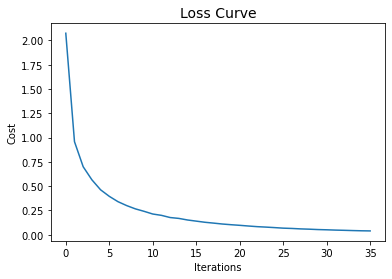

In [6]:
from sklearn.neural_network import MLPClassifier

#an untuned classifier
#mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=1000, validation_fraction=0.2, early_stopping=True)
mlp = MLPClassifier(random_state = 40)
mlp.fit(X_train, y_train)


#warm_start
mlp = MLPClassifier(early_stopping = True, warm_start = True, random_state = 40)
mlp.fit(X_train, y_train)

print (mlp.score(X_train,y_train))
print (mlp.score(X_test,y_test))
plt.plot(mlp.loss_curve_)
plt.title("Loss Curve", fontsize=14)
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.show()


In [25]:
print(X_train.shape)

(1000, 784)


In [29]:
from sklearn.model_selection import GridSearchCV

#hyperparameter tuning

#what parameters and parameter ranges to choose? IMPORTANT

#hidden_layer_sizes=(100)

#activation='relu'
#Activation function for the hidden layer.
#‘identity’, no-op activation, useful to implement linear bottleneck, returns f(x) = x
#‘logistic’, the logistic sigmoid function, returns f(x) = 1 / (1 + exp(-x)).
#‘tanh’, the hyperbolic tan function, returns f(x) = tanh(x).
#‘relu’, the rectified linear unit function, returns f(x) = max(0, x)

#solver='adam'
#The default solver ‘adam’ works pretty well on relatively large datasets 
#(with thousands of training samples or more) in terms of both training time and validation score. 
#For small datasets, however, ‘lbfgs’ can converge faster and perform better.

#alpha=0.0001
#L2 penalty (regularization term) parameter.

#batch_size='auto'
#Size of minibatches for stochastic optimizers.
#batch_size=min(200, n_samples)

#learning_rate='constant'
#Only used when solver='sgd', so I don't need to use it

#learning_rate_init=0.001
#The initial learning rate used. It controls the step-size in updating the weights.
#A higher learning rate makes the model learn faster, but it may miss the minimum loss function 
#and only reach the surrounding of it. A lower learning rate gives a better chance to find a minimum loss function. 
#As a tradeoff lower learning rate needs higher epochs, or more time and memory capacity resources.

#power_t=0.5
#The exponent for inverse scaling learning rate. 
#It is used in updating effective learning rate when the learning_rate is set to ‘invscaling’. 
#Only used when solver=’sgd’, so I don't need it

#max_iter=200
#Maximum number of iterations. The solver iterates until convergence (determined by ‘tol’) 
#or this number of iterations. For stochastic solvers (‘sgd’, ‘adam’), note that this determines 
#the number of epochs (The number of times a whole dataset is passed through the neural network model, 
#how many times each data point will be used), not the number of gradient steps.
#A too-small number of epochs results in underfitting. 
#The training dataset needs to pass multiple times or multiple epochs are required. 
#too many epochs will lead to overfitting

#shuffle=True
#Whether to shuffle samples in each iteration. Only used when solver=’sgd’ or ‘adam’.

#random_state=None
#Determines random number generation for weights and bias initialization, train-test split if early stopping is used, and batch sampling when solver=’sgd’ or ‘adam’
#Pass an int for reproducible results across multiple function calls. See Glossary.

#tol=0.0001
#Tolerance for the optimization. When the loss or score is not improving by at least 
#tol for n_iter_no_change consecutive iterations, unless learning_rate is set to ‘adaptive’, 
#convergence is considered to be reached and training stops.

#warm_start=False
#When set to True, reuse the solution of the previous call to fit as initialization, 
#otherwise, just erase the previous solution. See the Glossary.

#momentum=0.9
#Only used when solver=’sgd’.

#nesterovs_momentum=True
#Only used when solver=’sgd’ 

#validation_fraction=0.1
#The proportion of training data to set aside as validation set for early stopping. 

#beta_1=0.9
#Exponential decay rate for estimates of first moment vector in adam, should be in [0, 1).

#beta_2=0.999
#Exponential decay rate for estimates of second moment vector in adam, should be in [0, 1). 

#epsilon=1e-08
#Value for numerical stability in adam.

#n_iter_no_change=10
#Maximum number of epochs to not meet tol improvement. 

#max_fun=15000
#Only used when solver=’lbfgs’.

#TO USE: hidden_layer_sizes?, activation?, alpha, batch_size?, learning_rate_init, max_iter?, random_state?, tol?
#validation_fraction?, beta_1?, beta_2?, epsilon?, n_iter_no_change?

param_grid = {
    'hidden_layer_sizes': [(784,), (392,), (196,), (83,), (40,)],
    'activation': ['identity', 'logistic','tanh', 'relu'],
    'alpha': np.logspace(-3, -0, 10), #np.arange(0.0, 0.01, 0.0001),
    'learning_rate_init': np.arange(0.0, 0.01, 0.001),
    'max_iter' : [50, 100, 200, 300, 500],
}


tuned_mlp = GridSearchCV(mlp, param_grid, cv = 5, scoring='accuracy', verbose = 2, n_jobs=-1)
# perform search
tuned_mlp.fit(X_train, y_train)

# best estimator
params = tuned_mlp.best_params_

print(params)
print(tuned_mlp.score(X_train,y_train))
print(tuned_mlp.score(X_test,y_test))

Fitting 5 folds for each of 10000 candidates, totalling 50000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:   39.0s
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 373 tasks      | elapsed: 12.6min
[Parallel(n_jobs=-1)]: Done 664 tasks      | elapsed: 18.5min
[Parallel(n_jobs=-1)]: Done 1049 tasks      | elapsed: 21.4min
[Parallel(n_jobs=-1)]: Done 1526 tasks      | elapsed: 32.1min
[Parallel(n_jobs=-1)]: Done 2069 tasks      | elapsed: 41.3min
[Parallel(n_jobs=-1)]: Done 2740 tasks      | elapsed: 53.7min
[Parallel(n_jobs=-1)]: Done 3453 tasks      | elapsed: 64.6min
[Parallel(n_jobs=-1)]: Done 4274 tasks      | elapsed: 82.3min
[Parallel(n_jobs=-1)]: Done 5205 tasks      | elapsed: 96.6min
[Parallel(n_jobs=-1)]: Done 6168 tasks      | elapsed: 110.8min
[Parallel(n_jobs=-1)]: Done 7237 tasks      | elapsed: 132.9min
[Parallel(n_jobs=-1)]: Done 8410 tasks      | elapsed: 155.9min
[Parallel(n_jobs=-1)]: Done 9645 tasks     

{'activation': 'tanh', 'alpha': 1.0, 'hidden_layer_sizes': (83,), 'learning_rate_init': 0.003, 'max_iter': 50}
0.969
0.79


In [7]:
mlp_t = MLPClassifier(early_stopping = True, warm_start = False, random_state = 40, activation = 'tanh', alpha = 1.0, hidden_layer_sizes = (83,), learning_rate_init = 0.003, max_iter = 50)
mlp_t.fit(X_train, y_train)

MLPClassifier(activation='tanh', alpha=1.0, early_stopping=True,
              hidden_layer_sizes=(83,), learning_rate_init=0.003, max_iter=50,
              random_state=40)

In [31]:
from sklearn.model_selection import learning_curve

#plot learning curve function from the labs
def plot_learning_curve(n, mlp, xs, ys):
    train_sizes, train_scores, valid_scores = learning_curve(estimator = mlp, X = xs, y = ys, cv = n)
    # Find the mean of training and test scores out of 10-fod Stratified
    #KFold cross validation run as part fo execution of validation curve

    train_mean = np.mean(train_scores, axis=1)
    valid_mean = np.mean(valid_scores, axis=1)

    # Plot the model scores (accuracy) against the dataset size
    #added train sizes and removed markers after starting to compile, recompile
    plt.plot(train_sizes, train_mean, color='blue', label='Training Accuracy')
    plt.plot(train_sizes, valid_mean, color='green', label='Validation Accuracy')

    plt.xlabel('Dataset size')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()


In [8]:
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(mnist.data, mnist.target,test_size=0.2, random_state=40)

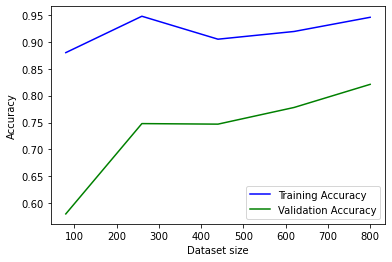

/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:582: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  warnings.warn(


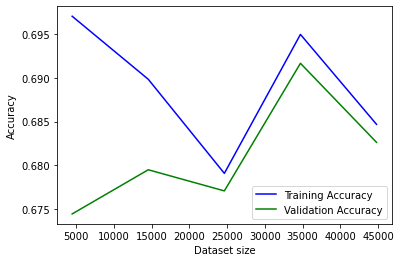

In [56]:
plot_learning_curve(5, mlp_t, X_train, y_train)
#plt.plot(tuned_mlp.loss_curve_, label = "training")
#plt.plot(tuned_mlp.validation_scores_, label = "validation")
#plt.legend()
plot_learning_curve(5, mlp_t, X_train_full, y_train_full)

In [9]:
mlp_t.fit(X_train_full, y_train_full)

MLPClassifier(activation='tanh', alpha=1.0, early_stopping=True,
              hidden_layer_sizes=(83,), learning_rate_init=0.003, max_iter=50,
              random_state=40)

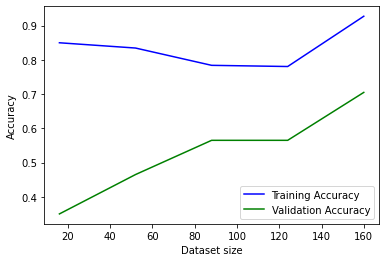

0.612
0.635


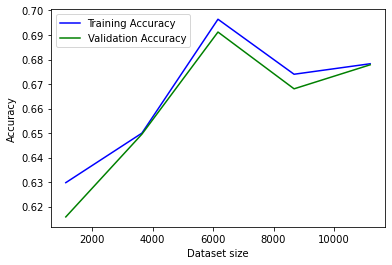

0.6751607142857143
0.6677857142857143


In [55]:
#results in the testing dataset
#maybe a confusion matrix?
plot_learning_curve(5, mlp_t, X_test, y_test)
print (mlp_t.score(X_train,y_train))
print (mlp_t.score(X_test,y_test))

plot_learning_curve(5, mlp_t, X_test_full, y_test_full)
print (mlp_t.score(X_train_full,y_train_full))
print (mlp_t.score(X_test_full,y_test_full))

In [ ]:
mlp_t.fit(X_train,y_train)
print (mlp_t.score(X_train,y_train))
print (mlp_t.score(X_test,y_test))
mlp_t.fit(X_train_full, y_train_full)
print (mlp_t.score(X_train_full,y_train_full))
print (mlp_t.score(X_test_full,y_test_full))

0.969
0.79


In [33]:
from sklearn.model_selection import validation_curve

def plot_validation_curve(mlp, X, y, p_name, p_range):
    train_scores, test_scores = validation_curve(estimator=mlp,
                                             X=X, y=y,
                                             cv=5,
    param_name=p_name, param_range=p_range)
#
# Find the mean of training and test scores out of 10-fod StratifiedKFold cross validation run as part fo execution of validation curve
#
    train_mean = np.mean(train_scores, axis=1)
    test_mean = np.mean(test_scores, axis=1)
#
    plt.plot(p_range, train_mean,
             marker='o', markersize=5,
             color='blue', label='Training Accuracy')
    plt.plot(p_range, test_mean,
             marker='o', markersize=5,
             color='green', label='Validation Accuracy')
    plt.xlabel(p_name)
    plt.ylabel('Accuracy')
    plt.grid()
    plt.show()

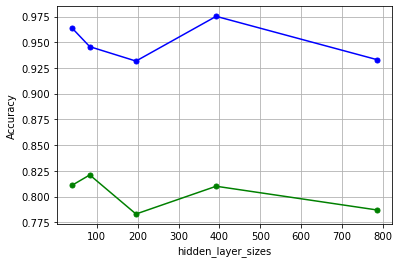

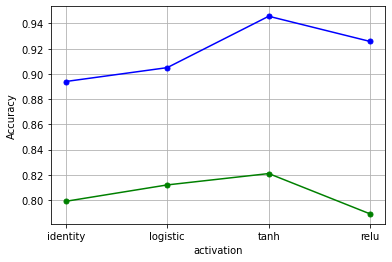

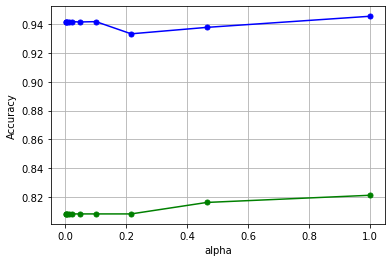

/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 1027, in fit
    return self._fit(X, y, incremental=(self.warm_start and
  File "/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 321, in _fit
    self._validate_hyperparameters()
  File "/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py", line 391, in _validate_hyperparameters
    raise ValueError("learning_rate_init must be >

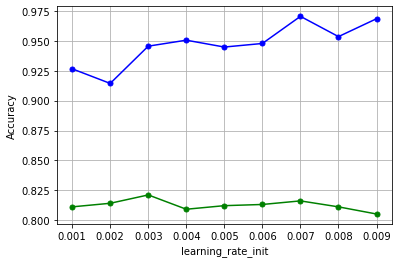

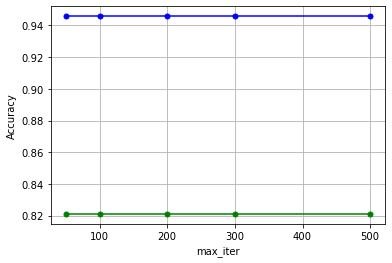

In [73]:
layer_range = [(784,), (392,), (196,), (83,), (40,)]
plot_validation_curve(mlp_t, X_train, y_train, 'hidden_layer_sizes', layer_range)

activation_range = list(['identity', 'logistic','tanh', 'relu'])
plot_validation_curve(mlp_t, X_train, y_train, 'activation', activation_range)

alpha_range = list(np.logspace(-3, -0, 10))
plot_validation_curve(mlp_t, X_train, y_train, 'alpha', alpha_range)

lr_range = list(np.arange(0.0, 0.01, 0.001))
plot_validation_curve(mlp_t, X_train, y_train, 'learning_rate_init', lr_range)

max_iter_range = list([50, 100, 200, 300, 500])
plot_validation_curve(mlp_t, X_train, y_train, 'max_iter', max_iter_range)

In [36]:
from matplotlib.colors import ListedColormap
def plot_decision_boundaries(X, y, model):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    #print(xx.shape)
    #print(xx.ravel().shape)
    #print(yy.shape)
    #print(yy.ravel().shape)
    #print(np.c_[xx.ravel(), yy.ravel()].shape)
    #model.fit(np.c_[xx.ravel(), yy.ravel()], y)
    #Z = model.predict(np.c_[xx.ravel(), yy.ravel()].reshape(-1, 1)) 
    Z = Z.reshape(xx.shape)
    colors = {'0':'red', '1':'green', '2':'blue', '3':'yellow', '4':'orange', '5':'pink', '6':'navy', '7':'grey', '8':'purple', '9':'violet'}
    
    print(Z.shape)
    print(Z.ravel().shape)
    print(X[:, 0].shape)
    print(X[:, 1].shape)
    
    colored_labels = np.array([colors[xi] for xi in y]) #Z.ravel()
    plt.contourf(xx, yy, Z, cmap='viridis')
    
    #plt.figure()
    #plt.pcolormesh(xx, yy, Z, cmap='viridis')

    cb = plt.colorbar()
    #cb.set_ticklabels(colors)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xlabel("PC1")
    plt.ylabel("PC2")
    #plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    #plt.scatter(X[:, 0], X[:, 1], cmap = colored_labels)
    #plt.scatter(X[:, 0], X[:, 1], c=colored_labels, cmap='viridis', s=10)

    plt.show()


(569, 582)
(331158,)
(1000,)
(1000,)


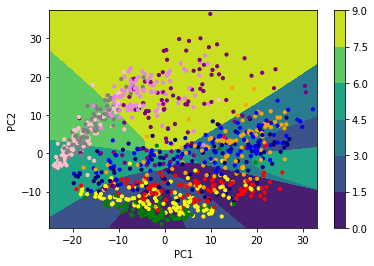

In [18]:
#plt.figure()
#print(X_train_full.shape)
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)
mlp_t.fit(np.c_[X_pca[:,0], X_pca[:,1]], y_train)
plot_decision_boundaries(X_pca, y_train, mlp_t)
#plt.show()


### 2.2.2 Support Vector Machines (15 marks)
Here you are going to study and discuss SVMs as a model for the fashion
MNIST classification dataset. In particular you should:
1. Train an SVM (with a specific Kernel), plot the training and validation learning curves. You may need to subsample the dataset if SVM training is taking too long. Do you see any signs of overfitting? Interpret and discuss your results. (1 mark)
32. What are your results in the testing dataset? Interpret and discuss your results. (2 marks)
3. How sensitive is this method to different hyperparameters? For example the different types of kernel (e.g. linear, RBF, etc.). Make use of plots (e.g. performance on test dataset as a function of different hyperparameters) to help you discuss this point. (5 marks)
4. Plot decision boundaries and discuss their relevance. (2 marks)
5. Compare your SVM results with the ANN above in terms of performance and the time it takes to train each method. For example, use bar plots to compare their performances and training times next to each other. Which is the better model? And why? (5 marks)

In [10]:
from sklearn import svm
from sklearn.svm import SVC

In [11]:
svm = SVC(C=4)
svm.fit(X_train, y_train)
print(f'SVM classifier accuracy: {svm.score(X_train, y_train)}')
print(f'SVM classifier accuracy - test set: {svm.score(X_test, y_test)}')

SVM classifier accuracy: 0.991
SVM classifier accuracy - test set: 0.86


In [24]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'C': [0.01, 0.1,1, 10, 100, 1000], 
    'gamma': [1,0.1,0.01,0.001, 0.0001],
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']
}
tuned_svm = GridSearchCV(svm, param_grid, cv = 5, scoring='accuracy', verbose = 2, n_jobs=-1)
# perform search
tuned_svm.fit(X_train, y_train)

# best estimator
params = tuned_svm.best_params_

print(params)
print(tuned_svm.score(X_train,y_train))
print(tuned_svm.score(X_test,y_test))

Fitting 5 folds for each of 120 candidates, totalling 600 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   19.0s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 600 out of 600 | elapsed:  4.6min finished


{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}
1.0
0.835


In [28]:
param_grid = {
    'C': np.linspace(0, 200, 50), #[0.01, 0.1,1, 10, 100, 1000], 
    'gamma': np.logspace(-3, -0, 50), #[1,0.1,0.01,0.001, 0.0001],
    'kernel': ['rbf']
}
tuned_svm = GridSearchCV(svm, param_grid, cv = 5, scoring='accuracy', verbose = 2, n_jobs=-1)
# perform search
tuned_svm.fit(X_train, y_train)

# best estimator
params = tuned_svm.best_params_

print(params)
print(tuned_svm.score(X_train,y_train))
print(tuned_svm.score(X_test,y_test))

Fitting 5 folds for each of 2500 candidates, totalling 12500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 tasks      | elapsed:    1.6s
[Parallel(n_jobs=-1)]: Done 482 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done 685 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 968 tasks      | elapsed:  9.7min
[Parallel(n_jobs=-1)]: Done 1333 tasks      | elapsed: 15.1min
[Parallel(n_jobs=-1)]: Done 1778 tasks      | elapsed: 22.4min
[Parallel(n_jobs=-1)]: Done 2305 tasks      | elapsed: 29.4min
[Parallel(n_jobs=-1)]: Done 2912 tasks      | elapsed: 37.7min
[Parallel(n_jobs=-1)]: Done 3601 tasks      | elapsed: 46.7min
[Parallel(n_jobs=-1)]: Done 4370 tasks      | elapsed: 58.5min
[Parallel(n_jobs=-1)]: Done 5221 tasks      | elapsed: 71.1min
[Parallel(n_jobs=-1)]: Done 6152 tasks      | elapsed: 85.4min
[Parallel(n_jobs=-1)]: Done 7165 tasks      | elapsed: 102.8min
[Parallel(n_jobs=-1)]: Done 8258 tasks      | elapsed: 117.8min
[Parallel(n_jobs=-1)]: Done 9433 tasks      

{'C': 8.16326530612245, 'gamma': 0.001, 'kernel': 'rbf'}
0.997
0.86


In [12]:
svm_t = SVC(C = 8.16326530612245, gamma = 0.001, kernel = 'rbf')
svm_t.fit(X_train, y_train)

SVC(C=8.16326530612245, gamma=0.001)

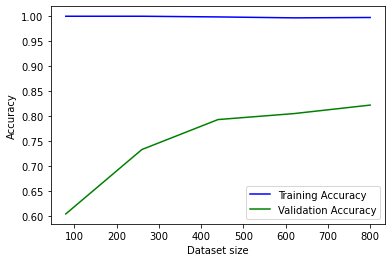

0.997


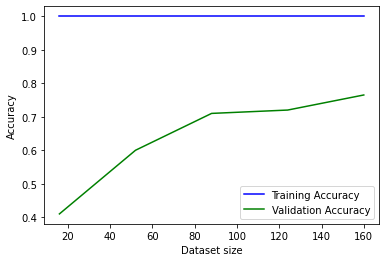

0.86


In [32]:
plot_learning_curve(5, svm_t, X_train, y_train)
print (svm_t.score(X_train,y_train))
plot_learning_curve(5, svm_t, X_test, y_test)
print (svm_t.score(X_test,y_test))

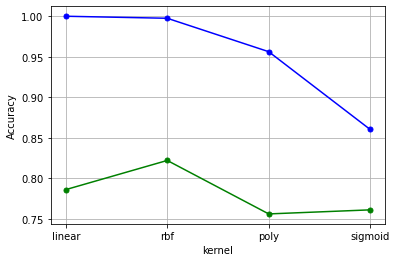

/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 217, in fit
    fit(X, y, sample_weight, solver_type, kernel, random_seed=seed)
  File "/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py", line 268, in _dense_fit
    self._probB, self.fit_status_ = libsvm.fit(
  File "sklearn/svm/_libsvm.pyx", line 191, in sklearn.svm._libsvm.fit
ValueError: C <= 0

  warnings.warn("Estimator fit failed. The score on this train-test"
/home/karolina/anaconda3/lib/python3.8/site-packages/sklearn/model_select

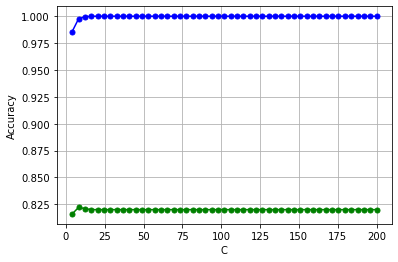

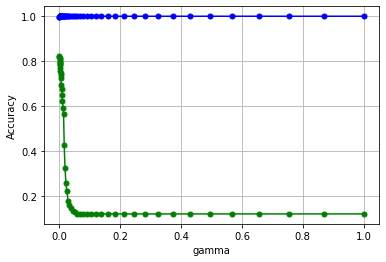

In [34]:
#plot_validation_curve(mlp, X, y, p_name, p_range):
plot_validation_curve(svm_t, X_train, y_train, 'kernel', ['linear', 'rbf', 'poly', 'sigmoid'])
C_range = np.linspace(0, 200, 50)
plot_validation_curve(svm_t, X_train, y_train, 'C', C_range)
gamma_range = np.logspace(-3, -0, 50)
plot_validation_curve(svm_t, X_train, y_train, 'gamma', gamma_range)

(569, 582)
(331158,)
(1000,)
(1000,)


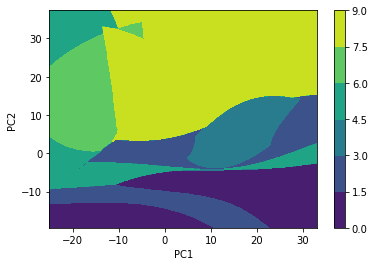

In [37]:

svm_t.fit(np.c_[X_pca[:,0], X_pca[:,1]], y_train)
plot_decision_boundaries(X_pca, y_train, svm_t)

 Compare your SVM results with the ANN above in terms of performance and the time it takes to train each method. For example, use bar plots to compare their performances and training times next to each other. Which is the better model? And why?

In [13]:
import time

In [ ]:

#start = time.time()
#mlp_t.fit(X_train_full, y_train_full)
#stop = time.time()
#mlp_time = stop-start
#print(f"MLP training time: {stop - start}s")

start = time.time()
svm_t.fit(X_train_full, y_train_full)
stop = time.time()
svm_time = stop-start
print(f"SVM training time: {stop - start}s")


In [ ]:
start = time.time()
mlp_t.fit(X_train_full, y_train_full)
stop = time.time()
mlp_time = stop-start
print(f"MLP training time: {stop - start}s")

In [14]:
import time
start = time.time()
mlp_t.fit(X_train, y_train)
stop = time.time()
mlp_time_smol = stop-start
print(f"MLP training time: {stop - start}s")

start = time.time()
svm_t.fit(X_train, y_train)
stop = time.time()
svm_time_smol = stop-start
print(f"SVM training time: {stop - start}s")


MLP training time: 1.0195269584655762s
SVM training time: 0.9994444847106934s


In [15]:
from sklearn.model_selection import learning_curve

#plot learning curve function from the labs
def plot_fit_times(n, clf1, clf2, xs, ys):
    train_sizes1, train_scores1, valid_scores1, fit_times1,_ = learning_curve(estimator = clf1, X = xs, y = ys, cv = n, return_times = True)
    # Find the mean of training and test scores out of 10-fod Stratified
    #KFold cross validation run as part fo execution of validation curve
    train_sizes2, train_scores2, valid_scores2, fit_times2,_ = learning_curve(estimator = clf2, X = xs, y = ys, cv = n, return_times = True)
    # Find the mean of training and test scores out of 10-fod Stratified
    #train_mean = np.mean(train_scores, axis=1)
    #valid_mean = np.mean(valid_scores, axis=1)
    fit_times_mean1 = np.mean(fit_times1, axis=1)
    fit_times_mean2 = np.mean(fit_times2, axis=1)

    # Plot the model scores (accuracy) against the dataset size
    #added train sizes and removed markers after starting to compile, recompile
    #plt.plot(train_sizes, train_mean, color='blue', label='Training Accuracy')
    #plt.plot(train_sizes, valid_mean, color='green', label='Validation Accuracy')
    plt.plot(train_sizes1, fit_times_mean1, color='red', label='mlp')
    plt.plot(train_sizes2, fit_times_mean2, color='green', label='svm')   
    plt.xlabel('Dataset size')
    plt.ylabel('Time')
    plt.legend()
    plt.show()


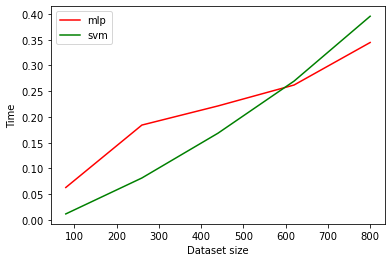

In [16]:
plot_fit_times(5, mlp_t, svm_t, X_train, y_train)

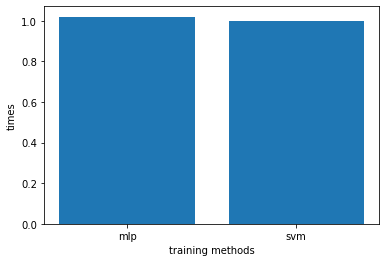

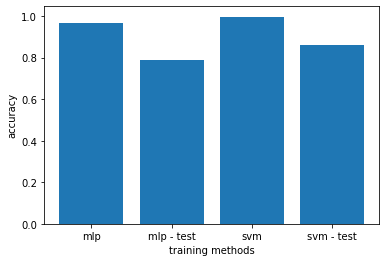

In [17]:
classifiers = ["mlp", 'svm']
times = [mlp_time_smol, svm_time_smol]
plt.bar(classifiers,times)
plt.xlabel('training methods')
plt.ylabel("times")
plt.show()

classifiers = ["mlp", "mlp - test", "svm", "svm - test"]
scores = [mlp_t.score(X_train,y_train), mlp_t.score(X_test,y_test), svm_t.score(X_train,y_train), svm_t.score(X_test,y_test)]
plt.bar(classifiers,scores)
plt.xlabel('training methods')
plt.ylabel("accuracy")
plt.show()